<a href="https://colab.research.google.com/github/Sateesh110/Rep_Medium/blob/master/A1_WikiTables_Scraping/A1_WikiTable_WorldPopulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#URLs" data-toc-modified-id="URLs-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>URLs</a></span></li><li><span><a href="#Request-&amp;-Response" data-toc-modified-id="Request-&amp;-Response-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Request &amp; Response</a></span></li><li><span><a href="#Wrangling-HTML-With-BeautifulSoup" data-toc-modified-id="Wrangling-HTML-With-BeautifulSoup-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Wrangling HTML With BeautifulSoup</a></span></li><li><span><a href="#Title-of-HTML-content" data-toc-modified-id="Title-of-HTML-content-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Title of HTML content</a></span></li><li><span><a href="#Find-All-Tables" data-toc-modified-id="Find-All-Tables-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Find All Tables</a></span></li><li><span><a href="#Find-Right-Table-to-scrap" data-toc-modified-id="Find-Right-Table-to-scrap-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Find Right Table to scrap</a></span></li><li><span><a href="#Number-of-Columns" data-toc-modified-id="Number-of-Columns-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Number of Columns</a></span></li><li><span><a href="#Get-the-Rows" data-toc-modified-id="Get-the-Rows-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Get the Rows</a></span></li><li><span><a href="#Get-Table-Header-Attributes" data-toc-modified-id="Get-Table-Header-Attributes-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Get Table Header Attributes</a></span></li><li><span><a href="#Get-Tablular-Data" data-toc-modified-id="Get-Tablular-Data-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Get Tablular Data</a></span><ul class="toc-item"><li><span><a href="#Data-Analysis" data-toc-modified-id="Data-Analysis-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Data Analysis</a></span></li><li><span><a href="#Scrap-the-Data" data-toc-modified-id="Scrap-the-Data-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Scrap the Data</a></span></li><li><span><a href="#Create-Dictionary" data-toc-modified-id="Create-Dictionary-10.3"><span class="toc-item-num">10.3&nbsp;&nbsp;</span>Create Dictionary</a></span></li><li><span><a href="#Create-DataFrame" data-toc-modified-id="Create-DataFrame-10.4"><span class="toc-item-num">10.4&nbsp;&nbsp;</span>Create DataFrame</a></span></li><li><span><a href="#Rename-DataFrame-Columns" data-toc-modified-id="Rename-DataFrame-Columns-10.5"><span class="toc-item-num">10.5&nbsp;&nbsp;</span>Rename DataFrame Columns</a></span></li><li><span><a href="#Top-5-Countries-with-Highest-Population" data-toc-modified-id="Top-5-Countries-with-Highest-Population-10.6"><span class="toc-item-num">10.6&nbsp;&nbsp;</span>Top 5 Countries with Highest Population</a></span></li><li><span><a href="#Lets-do-some-Clean-Up-!" data-toc-modified-id="Lets-do-some-Clean-Up-!-10.7"><span class="toc-item-num">10.7&nbsp;&nbsp;</span>Lets do some Clean Up !</a></span></li></ul></li><li><span><a href="#Visuals" data-toc-modified-id="Visuals-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Visuals</a></span></li></ul></div>

## Import Packages

In [30]:
# for performing your HTTP requests
import requests  

# for xml & html scrapping 
from bs4 import BeautifulSoup 

# for table analysis
import pandas as pd

# write to csv
import csv

# Time
import time

#Visuals
import matplotlib.pyplot as plt

## Input URLs

In [31]:
# url of wikipedia page from which you want to scrap tabular data.
url1 = "https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population"

## Request & Response

In [32]:
# Session helps to object allows you to persist certain parameters across requests
# By default, Request will keep waiting for a response indefinitely. Therefore, it is advised to set the timeout parameter.
# If the request was successful, you should see the reponse output as '200'.
s = requests.Session()
response = s.get(url1, timeout=10)
#response2 = s.get(url2, timeout=5)
response


<Response [200]>

## Wrangling HTML With BeautifulSoup

In [33]:
# parse response content to html
soup = BeautifulSoup(response.content, 'html.parser')

In [34]:
# to view the content in html format
pretty_soup = soup.prettify()

## Title of HTML content

In [35]:
# title of Wikipedia page
soup.title.string

'List of countries and dependencies by population - Wikipedia'

## Find All Tables

In [36]:
# find all the tables in the html
all_tables=soup.find_all('table')

## Find Right Table to scrap

In [37]:
# get right table to scrap
right_table=soup.find('table', {"class":'wikitable sortable'})

## Number of Columns

In [38]:
# Number of columns in the table
for row in right_table.findAll("tr"):
    cells = row.findAll('td')

len(cells)

7

## Get the Rows

In [39]:
# number of rows in the table including header
rows = right_table.findAll("tr")
len(rows)

243

## Get Table Header Attributes

In [40]:
# header attributes of the table
header = [th.text.rstrip() for th in rows[0].find_all('th')][1:]
print(header)
print('------------')
print(len(header))

['Country / Dependency', 'Region', 'Population', '% of world', 'Date', 'Source (official or from the United Nations)', 'Notes']
------------
7


## Get Tablular Data

### Data Analysis

In [41]:
lst_data = []
for row in rows[2:]:
            data = [d.text.rstrip() for d in row.find_all('td')]
            lst_data.append(data)

In [42]:
# select also works as find_all
lst_data1 = []
for row in rows[2:]:
            data = [d.text.rstrip() for d in row.select('td')]
            lst_data1.append(data)

In [43]:
# length of each record
len(lst_data1[0])

7

In [44]:
lst_data1 = pd.DataFrame(lst_data1, columns=header)
df = lst_data1.copy()
df.head(3)

,Country / Dependency,Region,Population,% of world,Date,Source (official or from the United Nations),Notes
0,China,Asia,"1,412,600,000",17.8%,31 Dec 2021,National annual estimate[2],The population figure refers to mainland China...
1,India,Asia,"1,387,993,646",17.5%,13 Feb 2022,National population clock[3],The figure includes the population of Indian-a...
2,United States,Americas,"333,219,943",4.20%,13 Feb 2022,National population clock[4],Includes the 50 states and the District of Col...


Scrap the data and append to respective lists

c1=[]
c2=[]
c3=[]
c4=[]
c5=[]
c6=[]
c7=[]
for row in right_table.findAll("tr"):
    cells = row.findAll('td')
    if len(cells)==6: #Only extract table body not heading
        c1.append(cells[0].find(text=True))
        c2.append(cells[1].find('a').text)  # fetch the text of the url in td tag. 
        c3.append(cells[2].find(text=True))
        c4.append(cells[3].find(text=True))
        c5.append(cells[4].find(text=True))
        c6.append(cells[5].find(text=True))
        c7.append(cells[5].find('a').get('href')) # get all source links as new list

create a dictionary
d = dict([(x,0) for x in header])
d

append dictionary with corresponding data list.
d['Rank'] = c1
d['Country(or dependent territory)']= c2
d['Population']=c3
d['Date']=c4
d['% of worldpopulation']=c5
d['Source']=c6
d['SourceLink']=c7

### Lets do some Clean Up !

In [45]:
new_cols = ["Country", "Region", "Population", "%ofworld", "Date", "Source", "Notes"]
df.columns= new_cols
df.columns

Index(['Country', 'Region', 'Population', '%ofworld', 'Date', 'Source',
       'Notes'],
      dtype='object')

In [46]:
# drop unwanted columns for visualization
df = df.drop(['Date','Source','Notes'], axis=1)
df.head(3)

,Country,Region,Population,%ofworld
0,China,Asia,"1,412,600,000",17.8%
1,India,Asia,"1,387,993,646",17.5%
2,United States,Americas,"333,219,943",4.20%


In [47]:
# repplace ',' and convert to float
df['Population'] = df['Population'].apply(lambda x: float(x.split()[0].replace(',', '')))


## Top 5 Countries with Highest Population

In [48]:
df['Population'] = df['Population'].astype(int)
df5 = df.sort_values("Population",ascending=False).head(5)
df5

,Country,Region,Population,%ofworld
0,China,Asia,1412600000,17.8%
1,India,Asia,1387993646,17.5%
2,United States,Americas,333219943,4.20%
3,Indonesia[b],Asia,271350000,3.42%
4,Pakistan,Asia,225200000,2.84%


## Visuals

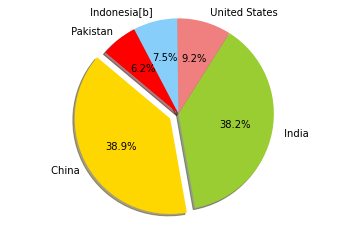

In [49]:
# Data to plot
labels = df5['Country']
sizes = df5['Population']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red']
autopct = df5 ['%ofworld']
explode = (0.1, 0, 0, 0,0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

Out of Top 5 populous countries, China takes the major pie with 39.3%. Also, given in 18.1%  is China's population compared with the population of the world. Next most populated country is India, with  37.9% of top 5 populated countries and its population density is 17.5% of world population. 